# Imports

In [2]:
import pyxdf
import pandas as pd
import numpy as np
from glob import glob
import datetime
import matplotlib.pyplot as plt
from pprint import pprint
import sys
import os 
module_dir = os.path.abspath('../important_files') 
sys.path.append(module_dir)
from utils import *
import math

# Load Data

In [3]:
subject = 'P5182010'
xdf_path = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'

In [4]:
sub_id = xdf_path.split('/')[6].split('-')[1]

mic_df = import_mic_data(xdf_path)
stim_df = import_stim_data(xdf_path)
et_df = import_et_data(xdf_path)
cam_df = import_video_data(xdf_path)
eeg_df = import_eeg_data(xdf_path)
ps_df = import_physio_data(xdf_path)

In [ ]:
exp_cam_df = get_event_data('Experiment', cam_df, stim_df)
exp_eeg_df = get_event_data('Experiment', eeg_df, stim_df)

NameError: name 'physio_df' is not defined

In [ ]:
exp_mic_df = get_event_data('Experiment', mic_df, stim_df)
exp_stim_df = get_event_data('Experiment', stim_df, stim_df)
exp_et_df = get_event_data('Experiment', et_df, stim_df)
exp_cam_df = get_event_data('Experiment', cam_df, stim_df)
exp_eeg_df = get_event_data('Experiment', eeg_df, stim_df)
exp_ps_df = get_event_data('Experiment', physio_df, stim_df)

NameError: name 'video_df' is not defined

In [7]:
exp_ps_df = get_event_data('Experiment', ps_df, stim_df)

In [10]:
eeg_df['time'] = eeg_df['lsl_time_stamp'] - eeg_df['lsl_time_stamp'][0]

In [11]:
et_df.loc[et_df['diff'] > 1600].index

Index([131240], dtype='int64')

In [13]:
range(len(et_df))

range(0, 137770)

/Users/camilla.strauss/Library/Caches/pypoetry/virtualenvs/mobi-qc-JEGqM8EY-py3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


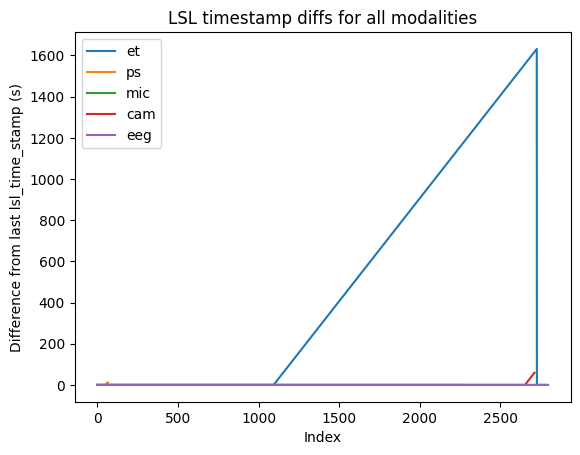

In [11]:
# check if diff already there, if not then make it 
df_map = {
    'et': et_df,
    'ps': ps_df,
    'mic': mic_df,
    'cam': cam_df,
    'eeg': eeg_df
    }

for key in df_map.keys():
    df_map[key]['diff'] = df_map[key]['lsl_time_stamp'].diff()
    plt.plot(df_map[key]['time'], df_map[key]['diff'], label = key)
    plt.ylabel('Difference from last lsl_time_stamp (s)')
    plt.xlabel('Index')

plt.title("LSL timestamp diffs for all modalities")
plt.legend()
plt.show()

In [ ]:
# check if diff already there, if not then make it 
df_map = {
    'et': et_df,
    'ps': ps_df,
    'mic': mic_df,
    'cam': cam_df,
    'eeg': eeg_df
    }

for key in df_map.keys():
    df_map[key]['diff'] = df_map[key]['lsl_time_stamp'].diff()
    plt.plot(df_map[key]['time'], df_map[key]['diff'], label = key)
    plt.ylabel('Difference from last lsl_time_stamp (s)')
    plt.xlabel('Index')

plt.title("LSL timestamp diffs for all modalities")
plt.legend()
plt.show()

0              NaN
1         0.008334
2         0.008334
3         0.008334
4         0.008334
            ...   
137765    0.008334
137766    0.008334
137767    0.008334
137768    0.008334
137769    0.008334
Name: diff, Length: 137770, dtype: float64

In [56]:
percent_data_loss

,sub_num,date,subject,modality,num_losses,percent_lost
0,P5182010,2024-10-16,P5182010,et,1,58.696%
3,P5182010,2024-10-16,P5182010,cam,1,2.174%
1,P5182010,2024-10-16,P5182010,ps,1,0.478%
2,P5182010,2024-10-16,P5182010,mic,0,0%
4,P5182010,2024-10-16,P5182010,eeg,0,0%


In [63]:
p

<BarContainer object of 5 artists>

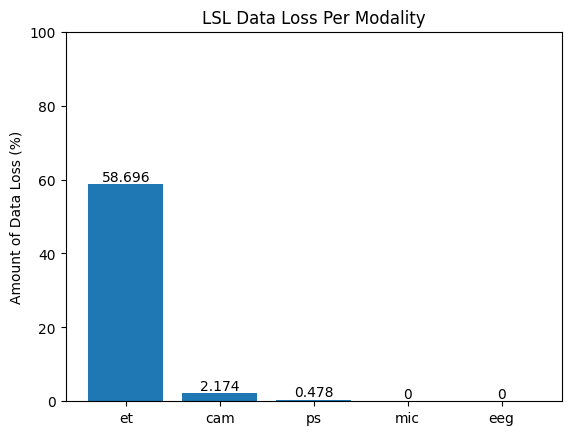

In [69]:
p = plt.bar(percent_data_loss['modality'], percent_data_loss['percent_lost'])
plt.bar_label(p)
plt.ylim(0, 100)
plt.ylabel('Amount of Data Loss (%)')
plt.title('LSL Data Loss Per Modality')
plt.show()

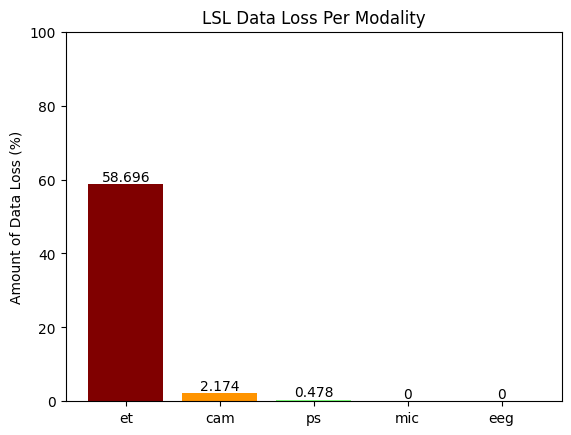

In [122]:
from matplotlib import cm

fig, ax = plt.subplots()
for i in range(len(percent_data_loss['modality'])):
    p = ax.bar(percent_data_loss.iloc[i]['modality'], percent_data_loss.iloc[i]['percent_lost'], color=cm.jet(1-i/4))
    ax.bar_label(p)
plt.ylim(0, 100)
plt.ylabel('Amount of Data Loss (%)')
plt.title('LSL Data Loss Per Modality')
plt.show()

/Users/camilla.strauss/Library/Caches/pypoetry/virtualenvs/mobi-qc-JEGqM8EY-py3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


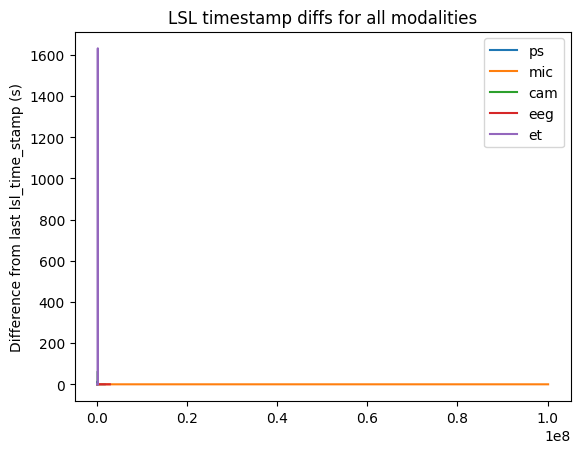

In [ ]:
df_map = {
    'et': et_df,
    'ps': ps_df,
    'mic': mic_df,
    'cam': cam_df,
    'eeg': eeg_df
    }

for key in df_map.keys():
    # df_map[key]['diff'] = df_map[key]['lsl_time_stamp'].diff()
    plt.plot(df_map[key].index, df_map[key]['diff'], label = key)
    plt.ylabel('Difference from last lsl_time_stamp (s)')
    # plt.xlabel('Index')

plt.title("LSL timestamp diffs for all modalities")
plt.legend()
plt.show()

In [46]:
et_df.iloc[-1]['time']

np.float64(2779.6589983626036)

/Users/camilla.strauss/Library/Caches/pypoetry/virtualenvs/mobi-qc-JEGqM8EY-py3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


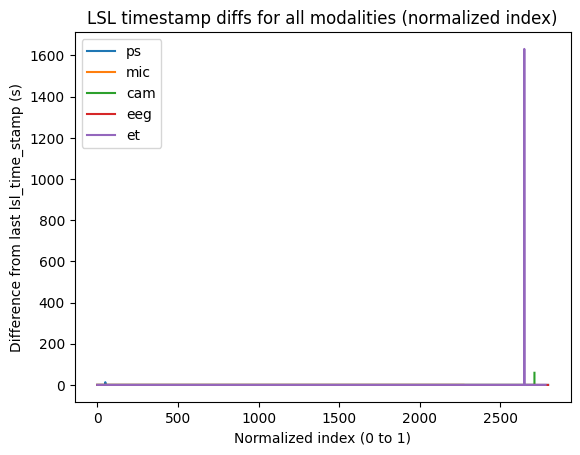

In [ ]:
for key in df_map:
    df = df_map[key]
    normalized_index = np.linspace(0, df.iloc[-1]['time'], len(df))  # uniform scale from 0 to 1
    plt.plot(normalized_index, df['diff'], label=key, alpha = 0.6)

plt.xlabel('Normalized index (0 to 1)')
plt.ylabel('Difference from last lsl_time_stamp (s)')
plt.title("LSL timestamp diffs for all modalities (normalized index)")
plt.legend()
plt.show()

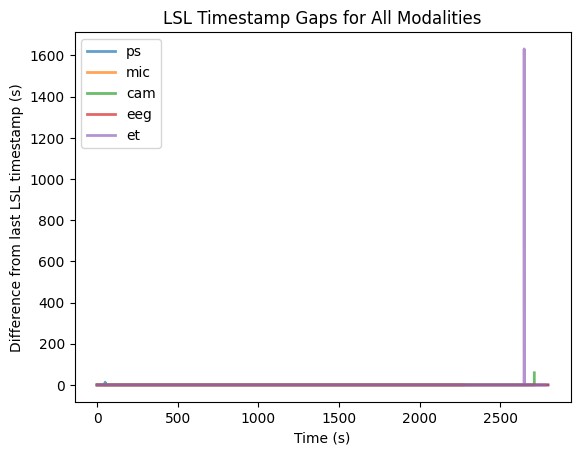

In [ ]:
# THIS COULD BE THE ONE
for key in df_map:
    df = df_map[key]
    normalized_index = np.linspace(0, df.iloc[-1]['time'], len(df))
    plt.plot(normalized_index, df['diff'], label=key, alpha = 0.7, linewidth = 1)

plt.xlabel('Time (s)')
plt.ylabel('Difference from last LSL timestamp (s)')
plt.title("LSL Timestamp Gaps for All Modalities")
plt.legend()
plt.show()

In [55]:
percent_data_loss

,sub_num,date,subject,modality,num_losses,percent_lost
0,P5182010,2024-10-16,P5182010,et,1,58.696%
3,P5182010,2024-10-16,P5182010,cam,1,2.174%
1,P5182010,2024-10-16,P5182010,ps,1,0.478%
2,P5182010,2024-10-16,P5182010,mic,0,0%
4,P5182010,2024-10-16,P5182010,eeg,0,0%


In [19]:
# check et_df value of lsl timestamps where time between 1000 and 2000
et_df.loc[et_df.time > 1500, ['time', 'lsl_time_stamp', 'diff']]

,time,lsl_time_stamp,diff
131240,2725.248947,655530.708012,1631.552508
131241,2725.257281,655530.716345,0.008334
131242,2725.265614,655530.724679,0.008334
131243,2725.273948,655530.733013,0.008334
131244,2725.282281,655530.741346,0.008334
...,...,...,...
137765,2779.625664,655585.084729,0.008334
137766,2779.633998,655585.093062,0.008334
137767,2779.642331,655585.101396,0.008334
137768,2779.650665,655585.109730,0.008334


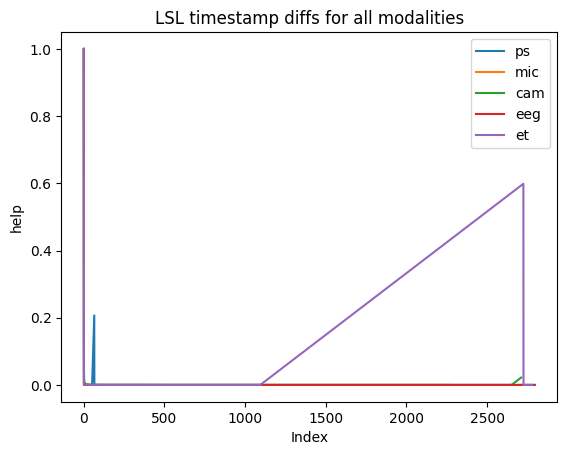

In [ ]:
# bad bc diffs at the beginning are going to be larger than ones at the end 
df_map = {
    'ps': ps_df,
    'mic': mic_df,
    'cam': cam_df,
    'eeg': eeg_df, 
    'et': et_df
    }

for key in df_map.keys():
    # df_map[key]['diff'] = df_map[key]['lsl_time_stamp'].diff()
    plt.plot(df_map[key]['time'], df_map[key]['diff']/df_map[key]['time'], label = key)
    plt.ylabel('help')
    plt.xlabel('Index')

plt.title("LSL timestamp diffs for all modalities")
plt.legend()
plt.show()

/Users/camilla.strauss/Library/Caches/pypoetry/virtualenvs/mobi-qc-JEGqM8EY-py3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


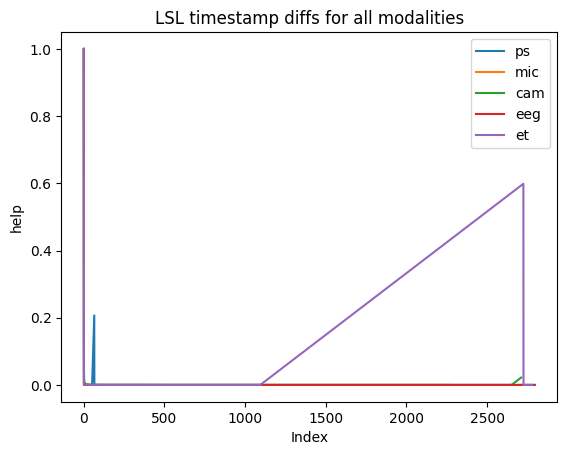

In [19]:
# check if diff already there, if not then make it 
df_map = {
    'ps': ps_df,
    'mic': mic_df,
    'cam': cam_df,
    'eeg': eeg_df, 
    'et': et_df
    }

for key in df_map.keys():
    # df_map[key]['diff'] = df_map[key]['lsl_time_stamp'].diff()
    with np.errstate(divide='ignore', invalid='ignore'):
        divide = df_map[key]['diff'] / df_map[key]['time']

    plt.plot(df_map[key]['time'], divide, label = key)
    plt.ylabel('help')
    plt.xlabel('Index')

plt.title("LSL timestamp diffs for all modalities")
plt.legend()
plt.show()

In [22]:
et_df

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_coordinate_system_0,left_gaze_origin_in_user_coordinate_system_1,left_gaze_origin_in_user_coordinate_system_2,right_gaze_origin_in_user_coordinate_system_0,right_gaze_origin_in_user_coordinate_system_1,right_gaze_origin_in_user_coordinate_system_2,left_gaze_origin_in_trackbox_coordinate_system_0,...,left_gaze_point_on_display_area_1,right_gaze_point_on_display_area_0,right_gaze_point_on_display_area_1,left_pupil_validity,right_pupil_validity,left_pupil_diameter,right_pupil_diameter,lsl_time_stamp,time,diff
0,1.667686e+12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,652805.459065,0.000000,NaN
1,1.667686e+12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,652805.467398,0.008334,0.008334
2,1.667686e+12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,652805.475732,0.016667,0.008334
3,1.667686e+12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,652805.484066,0.025001,0.008334
4,1.667686e+12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,652805.492399,0.033334,0.008334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137765,1.670466e+12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,655585.084729,2779.625664,0.008334
137766,1.670466e+12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,655585.093062,2779.633998,0.008334
137767,1.670466e+12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,655585.101396,2779.642331,0.008334
137768,1.670466e+12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,655585.109730,2779.650665,0.008334


In [26]:
et_df.assign(rate = et_df['diff'] / et_df['time'])[['diff', 'time', 'rate']]

,diff,time,rate
0,NaN,0.000000,NaN
1,0.008334,0.008334,1.000000
2,0.008334,0.016667,0.500000
3,0.008334,0.025001,0.333333
4,0.008334,0.033334,0.250000
...,...,...,...
137765,0.008334,2779.625664,0.000003
137766,0.008334,2779.633998,0.000003
137767,0.008334,2779.642331,0.000003
137768,0.008334,2779.650665,0.000003


# Quick check

In [ ]:
# quick check-- number of times et_df.lsl_time_stamp.diff() is over 1/120
sum([not math.isclose(x, 1/120, abs_tol=1e-2) for x in et_df.lsl_time_stamp.diff()]) - 1

0

In [ ]:
# indexes of where diff is not as expected: example with ps_df
srate = 1/(ps_df.lsl_time_stamp.diff().median())
ps_df['diff'] = ps_df.lsl_time_stamp.diff()

loss_index = np.where(ps_df['diff'] > 1/srate+.01)[0]
loss_index


array([], dtype=int64)

In [ ]:
loss_amounts = ps_df['diff'][loss_index]
loss_amounts

Series([], Name: diff, dtype: float64)

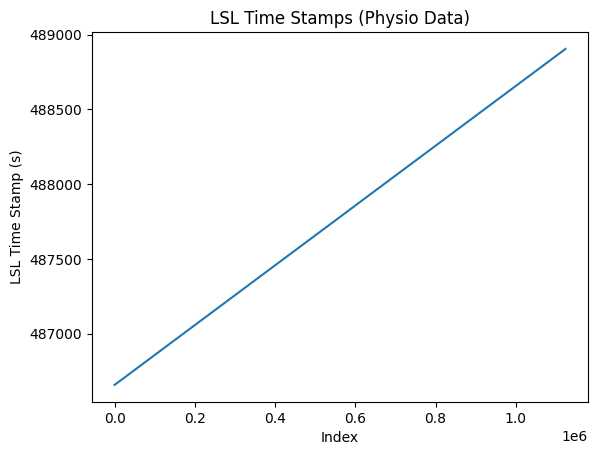

In [ ]:
plt.plot(ps_df['lsl_time_stamp'])
# plt.plot(loss_index, ps_df['lsl_time_stamp'][loss_index-1]-100, marker = 6, markersize = 6, linestyle='None') # optional add markers
plt.xlabel('Index')
plt.ylabel('LSL Time Stamp (s)')
plt.title('LSL Time Stamps (Physio Data)')
plt.savefig(f'report_images/{sub_id}_LSL_timestamps.png')
plt.show()

# Percentage of missing data 

In [58]:
# df with percent loss (diff greater than median)
modalities = ['et', 'ps', 'mic', 'cam', 'eeg']
percent_list = []

# time
timestamp = int(stim_df.loc[stim_df['event'] == 'psychopy_time_stamp', 'trigger'].iloc[0])
date_object = datetime.datetime.fromtimestamp(timestamp)
date_string = date_object.strftime("%Y-%m-%d")

for modality in modalities:
    df = globals()[modality+'_df']

    
    # median diff between lsl_time_stamp (with 1.05 margin) 
    df['diff'] = df['lsl_time_stamp'].diff()
    median = df['diff'].median() * 1.05
    # number of loss instances  
    loss_instances = (df['diff'] > median).sum()
    if loss_instances != 0:
        # amount of data skipped: values for which diff>median 
        amt_data_lost = df.loc[df['diff'] > median, 'diff'].values[0].sum()
        # total amount of data: last - first lsl_time_stamp
        amt_data_total = df['lsl_time_stamp'].values[-1] - df['lsl_time_stamp'].values[0]

        percent_lost = round(amt_data_lost/amt_data_total * 100, 3)
    else:
        percent_lost = 0
    percent_list.append({'sub_num':subject, 'date': date_string, 'subject': sub_id, 'modality': modality, 'num_losses': loss_instances, 'percent_lost': percent_lost})
        
percent_data_loss = pd.DataFrame(percent_list)
percent_data_loss.sort_values(by='percent_lost', inplace=True, ascending=False)
percent_data_loss


,sub_num,date,subject,modality,num_losses,percent_lost
0,P5182010,2024-10-16,P5182010,et,1,58.696
3,P5182010,2024-10-16,P5182010,cam,1,2.174
1,P5182010,2024-10-16,P5182010,ps,1,0.478
2,P5182010,2024-10-16,P5182010,mic,0,0.000
4,P5182010,2024-10-16,P5182010,eeg,0,0.000


In [ ]:
nonzero_loss = percent_data_loss[percent_data_loss['num_losses'] != 0]
nonzero_loss

,sub_num,date,subject,modality,num_losses,percent_lost


In [ ]:
nonzero_loss.empty

True

In [ ]:
# df with number of diff significantly BELOW median
short_diff_list = []

for modality in modalities:
    df = globals()[modality+'_df']
    
    # median diff between lsl_time_stamp (lower bound) (.99 for rounding)
    median_short = df['diff'].median() * .99
    # number of loss instances  
    short_instances = (df['diff'] < median_short).sum()

    short_diff_list.append({'sub_num':sub_number, 'date': date_string, 'subject': sub_id, 'modality': modality, 'num_short': short_instances})
        
short_diff_df = pd.DataFrame(short_diff_list)
if sum(short_diff_df.num_short) != 0:
    print(short_diff_df)

# Amount of loss before offset_socialtask

In [ ]:
# df with percent loss (diff greater than median), before social task offset
offset_social_timestamp = stim_df.loc[stim_df['event'] == 'Offset_SocialTask', 'lsl_time_stamp'].values[0]
social_percent_list = []

for modality in modalities:
    df = globals()[modality+'_df']
    social_df = df.loc[df.lsl_time_stamp <= offset_social_timestamp]

    # median diff between lsl_time_stamp (with 1.05 margin) 
    median1 = df['diff'].median() * 1.05

    # number of loss instances  
    loss_instances = (social_df['diff'] > median1).sum()
    percent_lost = 0
    amt_data_lost = 0

    # LSL loss starts and ends before offset_social
    if loss_instances != 0:
        # amount of data skipped: values for which diff>median 
        amt_data_lost = social_df.loc[social_df['diff'] > median1, 'diff'].values[0].sum()

    # offset social is between LSL loss onset + offset
    remaining_lost = offset_social_timestamp - social_df['lsl_time_stamp'].values[-1]
    if (remaining_lost) > 1:
        loss_instances +=1
        amt_data_lost = amt_data_lost + remaining_lost

    amt_data_total = offset_social_timestamp - social_df['lsl_time_stamp'].values[0]
    percent_lost = round(amt_data_lost/amt_data_total * 100, 3)

    social_percent_list.append({'sub_num':sub_number, 'date': date_string, 'subject': sub_id, 'modality': modality, 'num_losses': loss_instances, 'percent_lost': str(percent_lost)+'%'})
        
percent_data_loss_social = pd.DataFrame(social_percent_list)
percent_data_loss_social.sort_values(by='percent_lost', inplace=True, ascending=False)
percent_data_loss_social



,sub_num,date,subject,modality,num_losses,percent_lost
0,9,2025-02-17,P5070899,et,0,0.0%
1,9,2025-02-17,P5070899,ps,0,0.0%
2,9,2025-02-17,P5070899,mic,0,0.0%
3,9,2025-02-17,P5070899,cam,0,0.0%
4,9,2025-02-17,P5070899,eeg,0,0.0%


In [ ]:
nonzero_loss_social = percent_data_loss_social[percent_data_loss_social['percent_lost'] != 0]
nonzero_loss_social

,sub_num,date,subject,modality,num_losses,percent_lost
0,9,2025-02-17,P5070899,et,0,0.0%
1,9,2025-02-17,P5070899,ps,0,0.0%
2,9,2025-02-17,P5070899,mic,0,0.0%
3,9,2025-02-17,P5070899,cam,0,0.0%
4,9,2025-02-17,P5070899,eeg,0,0.0%


# Reported Metrics 

In [ ]:
print(percent_data_loss.loc[:, ['modality', 'percent_lost']].to_string(index = False, header = False))

 et 0%
 ps 0%
mic 0%
cam 0%
eeg 0%


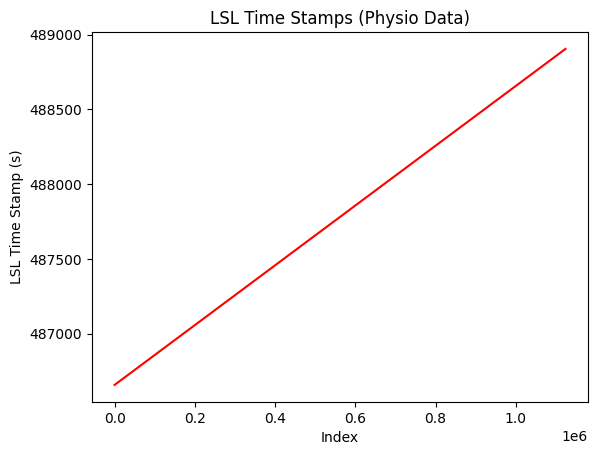

In [ ]:
plt.plot(ps_df['lsl_time_stamp'], color = 'r')
plt.xlabel('Index')
plt.ylabel('LSL Time Stamp (s)')
plt.title('LSL Time Stamps (Physio Data)')
plt.savefig(f'report_images/{subject}_LSL_timestamps.png')